<a href="https://colab.research.google.com/github/vaishnavilondhe-1708/OIBSIP_task2/blob/main/Customer_Segmentation_iFood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv("ifood_df.csv")
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [3]:
df.shape


(2205, 39)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [5]:
df.describe()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [6]:
df.isnull().sum()


,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [7]:
df = df.drop_duplicates()


In [8]:
num_cols= df.select_dtypes(include=np.number).columns
df[num_cols]= df[num_cols].fillna(df[num_cols].mean())


In [11]:
features = df[
    [
        'Income',
        'Recency',
        'MntWines',
        'MntFruits',
        'MntMeatProducts',
        'MntFishProducts',
        'MntSweetProducts',
        'MntGoldProds'
    ]
]


In [13]:
scaler= StandardScaler()
scaled_features= scaler.fit_transform(features)


In [14]:
wcss = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


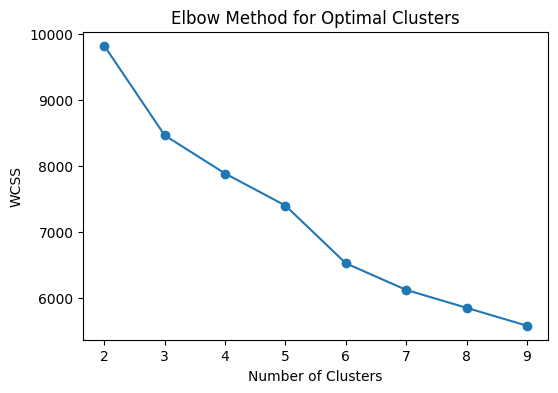

In [15]:
plt.figure(figsize=(6,4))
plt.plot(range(2,10), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['CustomerSegment'] = kmeans.fit_predict(scaled_features)


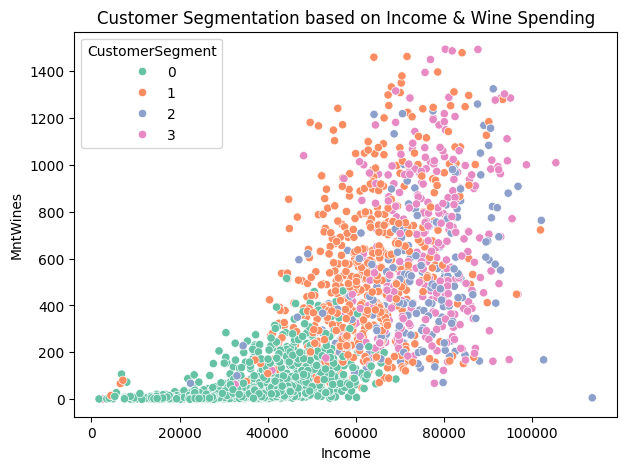

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df['Income'],
    y=df['MntWines'],
    hue=df['CustomerSegment'],
    palette='Set2'
)
plt.title("Customer Segmentation based on Income & Wine Spending")
plt.show()


In [18]:
segment_summary = df.groupby('CustomerSegment').mean()
segment_summary


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
CustomerSegment,,,,,,,,,,,,,,,,,,,,,
0,35812.522244,0.744681,0.513540,48.900387,61.970019,5.309478,28.235010,7.626692,5.375242,15.615087,...,0.255319,0.026112,0.098646,0.045455,0.484526,0.170213,0.201161,108.516441,92.901354,0.099613
1,62051.581673,0.189243,0.733068,47.125498,537.661355,21.179283,160.163347,30.760956,23.523904,64.400398,...,0.258964,0.041833,0.061753,0.001992,0.452191,0.183267,0.300797,773.288845,708.888446,0.456175
2,73743.837563,0.076142,0.350254,52.939086,509.609137,83.578680,392.309645,114.923858,131.776650,88.852792,...,0.248731,0.065990,0.147208,0.005076,0.659898,0.101523,0.086294,1232.197970,1143.345178,0.553299
3,75529.069444,0.055556,0.215278,49.093750,642.517361,71.861111,516.406250,104.267361,40.913194,79.121528,...,0.229167,0.031250,0.072917,0.000000,0.545139,0.163194,0.218750,1375.965278,1296.843750,0.590278


In [19]:
for segment in df['CustomerSegment'].unique():
    print(f"\nSegment {segment}")
    print(df[df['CustomerSegment'] == segment][['Income','Recency']].mean())



Segment 2
Income     73743.837563
Recency       52.939086
dtype: float64

Segment 0
Income     35812.522244
Recency       48.900387
dtype: float64

Segment 1
Income     62051.581673
Recency       47.125498
dtype: float64

Segment 3
Income     75529.069444
Recency       49.093750
dtype: float64


In [20]:
df.to_csv("segmented_ifood_customers.csv", index=False)
